#  KNN Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
data1 = pd.read_csv('Loan.csv')

In [3]:
data1


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data1.shape

(614, 13)

## Data Cleaning/EDA

In [5]:
data1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data1.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [8]:
data1.Credit_History.fillna('1',inplace=True)

In [9]:
data1.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [10]:
data1.Loan_Amount_Term.fillna(data1.Loan_Amount_Term.mean(),inplace=True)

In [11]:
data1.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [12]:
data1.LoanAmount.fillna(data1.LoanAmount.mean(),inplace=True)

In [13]:
data1.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
data1.Self_Employed.fillna('No',inplace=True)

In [15]:
data1.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
data1.Dependents.fillna(345,inplace=True)

In [17]:
data1.Married.fillna('Yes',inplace=True)

In [18]:
data1.Gender.fillna('Male',inplace=True)

In [19]:
data1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

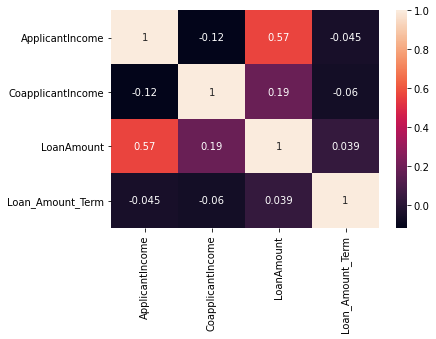

In [20]:
sns.heatmap(data1.corr(),annot=True)

## Splitting Data

In [21]:
data2 = data1.copy()

In [22]:
input= data2[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]

In [23]:
input.shape

(614, 11)

In [24]:
output = data2.Loan_Status

In [25]:
#Encoding categorical variables
Encoded_Input = pd.get_dummies(input,drop_first=True)
Encoded_Input

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Credit_History_1,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1,0,1,0,0,0,0,0,1,0,0,1
1,4583,1508.0,128.000000,360.0,1,1,0,1,0,0,0,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1,1,1,0,0,0,0,1,1,0,0,1
3,2583,2358.0,120.000000,360.0,1,1,1,0,0,0,1,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,0,0,1,0,0,0,0,0,1,0,0,0
610,4106,0.0,40.000000,180.0,1,1,0,0,0,1,0,0,1,0,0,0
611,8072,240.0,253.000000,360.0,1,1,0,1,0,0,0,0,1,0,0,1
612,7583,0.0,187.000000,360.0,1,1,0,0,1,0,0,0,1,0,0,1


In [26]:
#Standardization
std = StandardScaler()

In [27]:
x = std.fit(Encoded_Input).transform(Encoded_Input.astype('float'))
y = output

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=4)

## Model Selection,fitting the model,make prediction,check accuracy

In [29]:
k=4
model = KNeighborsClassifier(n_neighbors=k)

In [30]:
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [31]:
prediction = model.predict(xtest)


In [32]:
training_accuracy = accuracy_score(ytrain,model.predict(xtrain))
print('train_accuracy:',training_accuracy)

train_accuracy: 0.8513238289205702


In [33]:
testing_accuracy = accuracy_score(ytest,prediction)
print('testing_accuracy',testing_accuracy)

testing_accuracy 0.7154471544715447


## Finding best K value

In [34]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(xtrain,ytrain)
    yhat=neigh.predict(xtest)
    mean_acc[n-1] = accuracy_score(ytest, yhat)

    
    std_acc[n-1]=np.std(yhat==ytest)/np.sqrt(yhat.shape[0])

mean_acc

array([0.62601626, 0.59349593, 0.71544715, 0.71544715, 0.72357724,
       0.72357724, 0.7398374 , 0.73170732, 0.7398374 ])

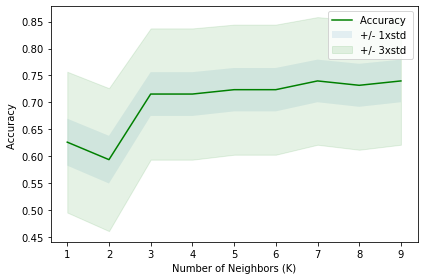

In [35]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [36]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7398373983739838 with k= 7


# Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
#Using the same preprocessed data set above by assigning the splitted data in to new variable x2 and y2
x2 = std.fit(Encoded_Input).transform(Encoded_Input.astype('float'))
y2 = output

In [39]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(x2,y2,test_size=0.2,random_state=4)

In [40]:
model2 = DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [41]:
model2.fit(xtrain2,ytrain2)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
prediction2 = model2.predict(xtest2)

In [43]:
training_accuracy2 = accuracy_score(ytrain2,model2.predict(xtrain2))

In [44]:
print('training_accuracy of decision tree classifier:',training_accuracy2)

training_accuracy of decision tree classifier: 0.835030549898167


In [45]:
testing_accuracy2 = accuracy_score(ytest2,prediction2)

In [46]:
print('testing_accuracy of decision tree classifier:',testing_accuracy2)

testing_accuracy of decision tree classifier: 0.7479674796747967


# Support Vector Machine Classifier

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,jaccard_score

In [48]:
#Using the same preprocessed data set above by assigning the splitted data in to new variable x3 and y3
x3 = std.fit(Encoded_Input).transform(Encoded_Input.astype('float'))
y3 = output

In [49]:
xtrain3,xtest3,ytrain3,ytest3 = train_test_split(x3,y3,test_size=0.2,random_state=4)

In [50]:
model3 = SVC()

In [51]:
model3.fit(xtrain3,ytrain3)

SVC()

In [52]:
prediction3 = model3.predict(xtest3)

In [53]:
testing_accuracy3_Method1 = f1_score(ytest3,prediction3,average='weighted')

In [54]:
print('testing_accuracy of SVM classifier by f1_score:',testing_accuracy3_Method1)

testing_accuracy of SVM classifier by f1_score: 0.7608962773413501


In [55]:
testing_accuracy3_Method2 = jaccard_score(ytest3,prediction3,pos_label='Y')

In [56]:
print('testing_accuracy of SVM classifier by jaccard_index:',testing_accuracy3_Method2)

testing_accuracy of SVM classifier by jaccard_index: 0.7570093457943925


# Logistic Regression Classifier

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [58]:
#Using the same preprocessed data set above by assigning the splitted data in to new variable x4 and y4
x4 = std.fit(Encoded_Input).transform(Encoded_Input.astype('float'))
y4 = output

In [59]:
xtrain4,xtest4,ytrain4,ytest4 = train_test_split(x4,y4,test_size=0.2,random_state=4)

In [60]:
model4 = LogisticRegression(C=0.01, solver='liblinear')

In [61]:
model4.fit(xtrain4,ytrain4)

LogisticRegression(C=0.01, solver='liblinear')

In [62]:
prediction4 = model4.predict(xtest4)

In [63]:
testing_accuracy4_Method1 = f1_score(ytest3,prediction4,average='weighted')

In [64]:
print('testing_accuracy of Logistic regression classifier by f1_score:',testing_accuracy4_Method1)

testing_accuracy of Logistic regression classifier by f1_score: 0.7719885428710175


In [65]:
testing_accuracy4_Method2 = jaccard_score(ytest4,prediction4,pos_label='Y')

In [66]:
print('testing_accuracy of Logistic regression classifier by jaccard_index:',testing_accuracy4_Method2)

testing_accuracy of Logistic regression classifier by jaccard_index: 0.7641509433962265


In [67]:
prediction4_prob = model4.predict_proba(xtest4)

In [68]:
log_loss(ytest4,prediction4_prob)

0.5623461953212892

# Conclusion
### 1.The best accurcay we are getting while using KNN classifier                  : 73.9 when k=7
### 2.The best accuracy we are getting while using DecisionTree classifier   : 74.7 
### 3.The best accuracy we are getting while using SVM classifier : 76.1(f1_score) and 75.7(jaccard_score)
### 4.The best accuracy we are getting while using Logistic Regression classifier : 77.2(f1_score),
###     76.4(jaccard_score),56.2(log_loss)

### All classifiers giving good results with slight variations. However SVM and Logistic Regression remains top of all these while using different evaluation methods. But in the case of Logistic Regression we are getting a considerable variation when applying log_loss method with other ones so that it may need further checking .So the best classifier which gives the maximum accuracy for our model can be considered as SVM